<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет,  Меня зовут , и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

## Предсказание стоимости жилья

В проекте вам нужно обучить модель линейной регрессии на данных о жилье в Калифорнии в 1990 году. На основе данных нужно предсказать медианную стоимость дома в жилом массиве. Обучите модель и сделайте предсказания на тестовой выборке. Для оценки качества модели используйте метрики RMSE, MAE и R2.

### Описание данных

Данные, которые вы будете анализировать, были собраны в рамках переписи населения в США. Каждая строка содержит агрегированную статистику о жилом массиве. Жилой массив — минимальная географическая единица с населением от 600 до 3000 человек в зависимости от штата. Одна строка в данных содержит статистику в среднем о 1425.5 обитателях жилого массива.

В колонках датасета содержатся следующие данные:

- `longitude` — широта;
- `latitude` — долгота;
- `housing_median_age` — медианный возраст жителей жилого массива;
- `total_rooms` — общее количество комнат в домах жилого массива;
- `total_bedrooms` — общее количество спален в домах жилого массива;
- `population` — количество человек, которые проживают в жилом массиве;
- `households` — количество домовладений в жилом массиве;
- `median_income` — медианный доход жителей жилого массива;
- `median_house_value` — медианная стоимость дома в жилом массиве;
- `ocean_proximity` — близость к океану.

В большинстве колонок хранятся количественные данные, кроме одной — `ocean_proximity`. Она хранит категориальные значения.

### План по проекта 

1. Инициализация Spark-сессии: Создать локальную Spark-сессию.
2. Чтение и загрузка данных: Прочитать данные из файла /datasets/housing.csv.
3. Исследование данных: Вывести типы данных колонок датасета, исследовать наличие пропусков и выполнить их заполнение, при необходимости преобразовать категориальные значения техникой One hot encoding.
4. Построение модели: Подготовить данные и построить две модели линейной регрессии — на всех данных из файла и только на числовых переменных (исключив категориальные).
5. Оценка модели: Сравнить результаты работы обеих моделей по метрикам RMSE, MAE и R2.

### Цель проекта:

При использовании PySpark, построить модели линейной регрессии на данных о жилье в Калифорнии в 1990 году с целью прогнозирования медианной стоимости домов. Оценить качество модели по метрикам RMSE, MAE и R2.

# Подготовка данных

In [1]:
#импорты библиотек и модулей
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pyspark
import pyspark.sql.functions as F

from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

## global seed ##
import random
rnd_state = 12345
np.random.seed(rnd_state)
random.seed(rnd_state)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

Инициализация локальной Spark-сессии:

In [2]:
spark = SparkSession.builder \
                    .master("local") \
                    .appName("EDA California Housing") \
                    .getOrCreate()

In [3]:
#Чтение содержимого файла housing.csv:
df_housing = spark.read.csv('/datasets/housing.csv', header=True, inferSchema=True)

In [4]:
# выведите названия колонок 
print(pd.DataFrame(df_housing.dtypes, columns=['column', 'type']).head(10))

# выведите первые 10 строк 
df_housing.show(10)

               column    type
0           longitude  double
1            latitude  double
2  housing_median_age  double
3         total_rooms  double
4      total_bedrooms  double
5          population  double
6          households  double
7       median_income  double
8  median_house_value  double
9     ocean_proximity  string
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично!  Выведены типы данных и первые строчки таблицы.</font>

Исходя из вывода типов данных колонок датасета, видно, что большинство признаков имеют тип double, что вполне логично, так как они представляют собой числовые значения. Только колонка "ocean_proximity" имеет тип string, что говорит о том, что это категориальный признак, представленный в виде текстовых меток. Это подтверждает необходимость проведения предобработки данных, включая кодирование категориальных признаков (например, техникой One-Hot Encoding) перед обучением модели машинного обучения.

In [5]:
#выведем базовые статистики
df_housing.describe().toPandas()

,summary,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,count,20640,20640,20640,20640,20433,20640,20640,20640,20640,20640
1,mean,-119.56970445736148,35.6318614341087,28.639486434108527,2635.7630813953488,537.8705525375618,1425.4767441860465,499.5396802325581,3.8706710029070246,206855.81690891474,None
2,stddev,2.003531723502584,2.135952397457101,12.58555761211163,2181.6152515827944,421.38507007403115,1132.46212176534,382.3297528316098,1.899821717945263,115395.61587441359,None
3,min,-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0,<1H OCEAN
4,max,-114.31,41.95,52.0,39320.0,6445.0,35682.0,6082.0,15.0001,500001.0,NEAR OCEAN


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что в Пандас попадают уже агрегированные данные.</font>

**Выполним предобработку данных:**

In [6]:
#Исследуем наличие пропусков
columns = df_housing.columns

for column in columns:
    print(column, df_housing.where(F.isnan(column) | F.col(column).isNull()).count())

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 207
population 0
households 0
median_income 0
median_house_value 0
ocean_proximity 0


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Обнаружены пропуски!</font>

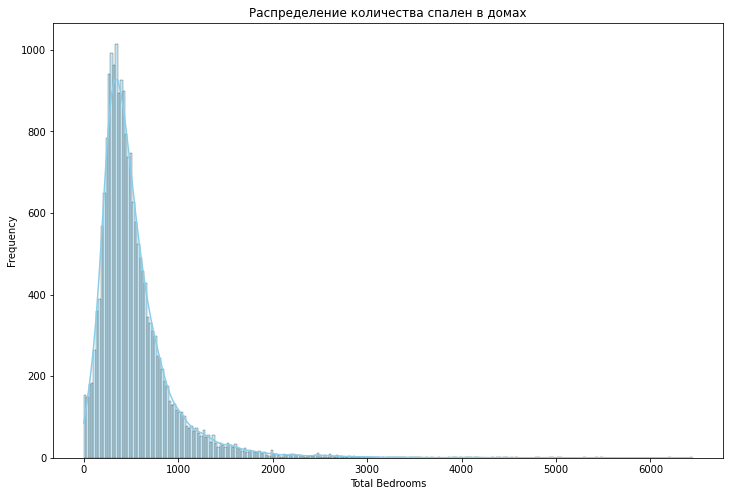

In [7]:
# Построение гистограммы для столбца 'total_bedrooms' с распределением значений
plt.figure(figsize=(12, 8))
sns.histplot(data=df_housing.toPandas(), x='total_bedrooms', kde=True, color='skyblue')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')
plt.title('Распределение количества спален в домах')
plt.show()

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>При использовании .toPandas() ты выгружаешь данные в оперативную память, что при работе с действительно большими данными приведет к переполнению памяти, этот метод применяется только к агрегированным таблицам(либо к ограниченным подвыборкам). Попробуй реализовать схожий функционал с применением методов pySpark.\
Даже одна колонка это много. Для ввывода общих статистик применяется сэмплирование.
</font>

И мы видим картинку очень похожую на Гамма-распределение, поскольку гамма-распределение имеет отличную от нормального распределение форму и свойства. Вместо заполнения пропусков медианным значением, при работе с данными, которые следуют гамма-распределению, целесообразнее рассматривать специализированные методы обработки пропущенных значений.

Поскольку столбец "total_bedrooms" имеет 207 пропущенных значений, заполним их методом интерполяции для обеспечения более точной и надежной обработки отсутствующих данных.

In [8]:
# Заполнение пропусков методом интерполяции
df_housing = df_housing.fillna(0, subset=['total_bedrooms'])  # Заполнение нулями для пропущенных значений
df_housing = df_housing.withColumn('total_bedrooms', F.col('total_bedrooms').cast('double'))  # Приведение столбца к типу double
df_housing = df_housing.fillna({'total_bedrooms': 'nearest'}, subset=['total_bedrooms'])  # Интерполяция пропущенных значений

In [9]:
#Проверим что получилось
columns = df_housing.columns

for column in columns:
    print(column, df_housing.where(F.isnan(column) | F.col(column).isNull()).count())

longitude 0
latitude 0
housing_median_age 0
total_rooms 0
total_bedrooms 0
population 0
households 0
median_income 0
median_house_value 0
ocean_proximity 0


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Заполнили пропуски!</font>

Проверим данные на выбросы.

In [10]:
#функция для построения диаграммы boxplot
def boxplots_for_numeric_columns(df):
    numeric_columns = [column for (column, dtype) in df.dtypes if dtype in ['int', 'double']]

    for column in numeric_columns:
        sns.boxplot(x=column, data=df.toPandas())
        plt.title(f'Boxplot for {column}')
        plt.show()

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>.toPandas()</font>

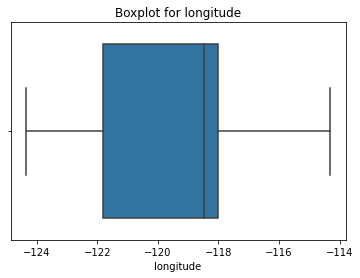

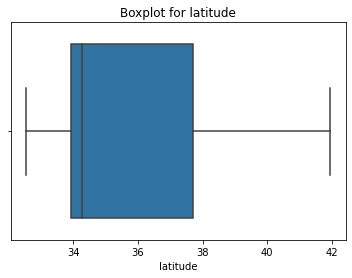

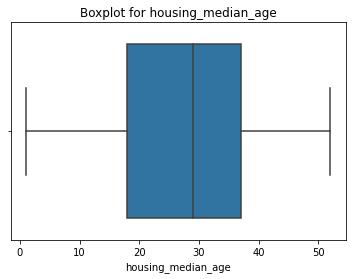

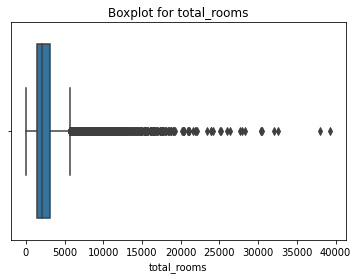

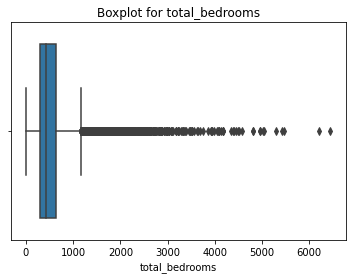

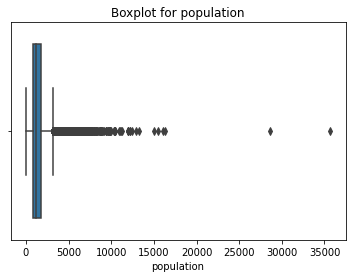

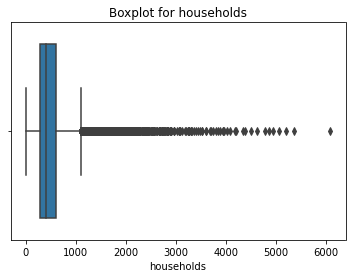

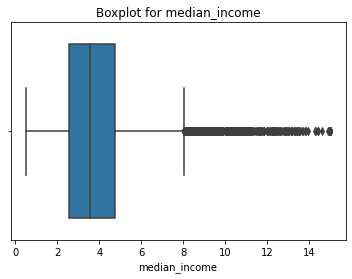

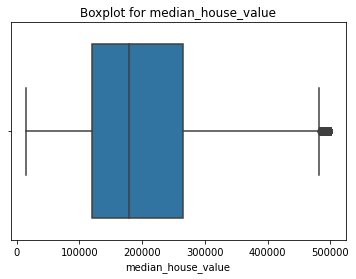

In [11]:
boxplots_for_numeric_columns(df_housing)

**Преобразование категориальных признаков:**

In [12]:
#Разделим колонки на числовые и категориальные данные:
categorical_cols = ['ocean_proximity']
numerical_cols  = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
target = 'median_house_value' 

Следующим шагом выполним преобразование признаков. Мы будем преобразовывать столбец с категориальными значениями с использованием базовых трансформеров признаков - StringIndexer и OneHotEncoder:

In [13]:
#Трансформируем категориальные признаки в числовое представление с помощью трансформера StringIndexer:
indexer = StringIndexer(inputCols=categorical_cols, 
                        outputCols=[c+'_idx' for c in categorical_cols]) 
df_housing = indexer.fit(df_housing).transform(df_housing)

cols = [c for c in df_housing.columns for i in categorical_cols if (c.startswith(i))]
df_housing.select(cols).show(5)

+---------------+-------------------+
|ocean_proximity|ocean_proximity_idx|
+---------------+-------------------+
|       NEAR BAY|                3.0|
|       NEAR BAY|                3.0|
|       NEAR BAY|                3.0|
|       NEAR BAY|                3.0|
|       NEAR BAY|                3.0|
+---------------+-------------------+
only showing top 5 rows



<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>Кодирование и Стандартизацию нужно проводить после разделения на выборки трансформерами обучеными на обучающих данных.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='blue'>Можно использовать [Pipeline](https://habr.com/ru/post/522296/)</font>

In [14]:
#Выполним OHE-кодирование для категорий:
encoder = OneHotEncoder(inputCols=[c+'_idx' for c in categorical_cols],
                        outputCols=[c+'_ohe' for c in categorical_cols])
df_housing = encoder.fit(df_housing).transform(df_housing)

cols = [c for c in df_housing.columns for i in categorical_cols if (c.startswith(i))]
df_housing.select(cols).show(5)

+---------------+-------------------+-------------------+
|ocean_proximity|ocean_proximity_idx|ocean_proximity_ohe|
+---------------+-------------------+-------------------+
|       NEAR BAY|                3.0|      (4,[3],[1.0])|
|       NEAR BAY|                3.0|      (4,[3],[1.0])|
|       NEAR BAY|                3.0|      (4,[3],[1.0])|
|       NEAR BAY|                3.0|      (4,[3],[1.0])|
|       NEAR BAY|                3.0|      (4,[3],[1.0])|
+---------------+-------------------+-------------------+
only showing top 5 rows



<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Верно, что применяешь OHE для Линейной Регрессии.</font>

Категориальный столбец был преобразован в векторный формат.

Также, для числовых признаков требуется применить трансформацию - масштабирование значений, чтобы избежать их смещения из-за сильных выбросов и искажения прогнозов модели. Будем использовать метод StandardScaler.

Затем мы соберем вектор числовых признаков в отдельный столбец.

In [15]:
#Соберём вектор числовых признаков  
numerical_assembler = VectorAssembler(inputCols=numerical_cols, outputCol='numerical_features')
df_housing = numerical_assembler.transform(df_housing) 

In [16]:
#Применим StandardScaler.
standardScaler = StandardScaler(inputCol='numerical_features', outputCol='numerical_features_scaled')
df_housing = standardScaler.fit(df_housing).transform(df_housing)
df_housing.printSchema()

root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)
 |-- ocean_proximity_idx: double (nullable = false)
 |-- ocean_proximity_ohe: vector (nullable = true)
 |-- numerical_features: vector (nullable = true)
 |-- numerical_features_scaled: vector (nullable = true)



И напоследок прибегнем к помощи VectorAssembler 

In [17]:
all_features = ['ocean_proximity_ohe','numerical_features_scaled']

final_assembler = VectorAssembler(inputCols=all_features, outputCol='features')
df_housing = final_assembler.transform(df_housing)

In [18]:
df_housing.select('features','numerical_features_scaled').show(5)

+--------------------+-------------------------+
|            features|numerical_features_scaled|
+--------------------+-------------------------+
|[0.0,0.0,0.0,1.0,...|     [-61.007269596069...|
|[0.0,0.0,0.0,1.0,...|     [-61.002278409814...|
|[0.0,0.0,0.0,1.0,...|     [-61.012260782324...|
|[0.0,0.0,0.0,1.0,...|     [-61.017251968579...|
|[0.0,0.0,0.0,1.0,...|     [-61.017251968579...|
+--------------------+-------------------------+
only showing top 5 rows



# Обучение моделей

Разделим данные на тренировочные и тестовые.

In [19]:
train, test = df_housing.randomSplit([.8,.2], seed=rnd_state)
# посмотрим размерность (форму) массивов
print(train.count(), test.count()) 

16431 4209


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Здорово , что у нас есть выборка для тестов!</font>

Построим модели линейной регрессии, первую на всех данных и вторую только на числовых переменных (исключив категориальные).

In [20]:
lr_1 = LinearRegression(labelCol=target, featuresCol='features',
                          maxIter=10, regParam=0.3, elasticNetParam=0.8)
model_1 = lr_1.fit(train)

24/02/13 20:08:31 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
24/02/13 20:08:31 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [21]:
lr_2 = LinearRegression(labelCol=target, featuresCol='numerical_features_scaled',
                          maxIter=10, regParam=0.3, elasticNetParam=0.8)
model_2 = lr_2.fit(train)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Обучили модели!</font>

Посмотрим на предсказания моделей, по признаками:

In [22]:
predictions_1 = model_1.transform(test)
predicted_1 = predictions_1.select('median_house_value', 'prediction')
predicted_1.show(5)

+------------------+------------------+
|median_house_value|        prediction|
+------------------+------------------+
|          106700.0| 232863.5375543501|
|          128900.0| 224388.1531130838|
|          116100.0|250217.83879596821|
|           70500.0|182086.25426291476|
|           85600.0|205830.03977502685|
+------------------+------------------+
only showing top 5 rows



In [23]:
predictions_2 = model_2.transform(test)
predicted_2 = predictions_2.select('median_house_value', 'prediction')
predicted_2.show(5)

+------------------+------------------+
|median_house_value|        prediction|
+------------------+------------------+
|          106700.0|195430.24996008445|
|          128900.0|176984.39327707607|
|          116100.0| 203930.5276065953|
|           70500.0|136455.74683756335|
|           85600.0| 160565.2425246504|
+------------------+------------------+
only showing top 5 rows



**Вывод**

Мы провели разделение данных на обучающие и тестовые выборки, обучили модели линейной регрессии и проанализировали их прогнозы.

# Анализ результатов

Создадим функцию для сравнения моделей линейной регрессии на двух наборах данных с использованием метрик RMSE, MAE и R2.

In [24]:
#функция выводит графики сравнения моделей для каждой метрики в отдельном окне
def compare_metrics(model1, model2):
    summary1 = model1.summary
    summary2 = model2.summary
    
    print("Model 1 Metrics:")
    print('RMSE: %f' % summary1.rootMeanSquaredError)
    print('MAE: %f' % summary1.meanAbsoluteError)
    print('R2: %f' % summary1.r2)

    print("\nModel 2 Metrics:")
    print('RMSE: %f' % summary2.rootMeanSquaredError)
    print('MAE: %f' % summary2.meanAbsoluteError)
    print('R2: %f' % summary2.r2)

    # Построение графиков для каждой метрики
    plt.figure(figsize=(12, 4))
    plt.barh('Model 1', summary1.rootMeanSquaredError, color='skyblue')
    plt.barh('Model 2', summary2.rootMeanSquaredError, color='salmon')
    plt.xlabel('RMSE Score')
    plt.title('Comparison of RMSE Between Two Models')
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.barh('Model 1', summary1.meanAbsoluteError, color='skyblue')
    plt.barh('Model 2', summary2.meanAbsoluteError, color='salmon')
    plt.xlabel('MAE Score')
    plt.title('Comparison of MAE Between Two Models')
    plt.show()
  
    plt.figure(figsize=(12, 4))
    plt.barh('Model 1', summary1.r2, color='skyblue')
    plt.barh('Model 2', summary2.r2, color='salmon')
    plt.xlabel('R2 Score')
    plt.title('Comparison of R2 Between Two Models')
    plt.show()

Model 1 Metrics:
RMSE: 69610.584031
MAE: 50390.495256
R2: 0.635225

Model 2 Metrics:
RMSE: 70447.955404
MAE: 51388.608285
R2: 0.626396


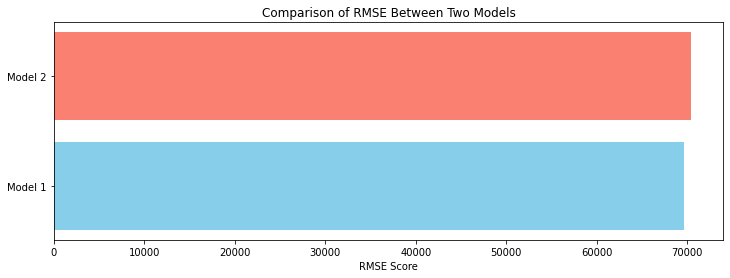

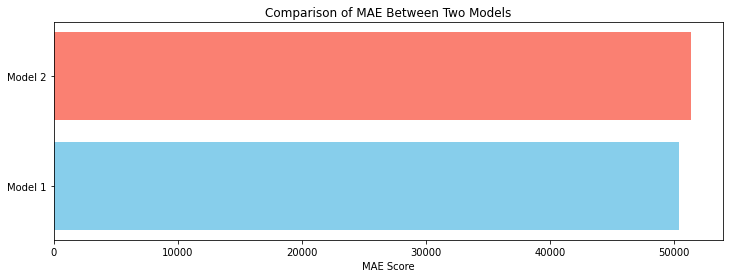

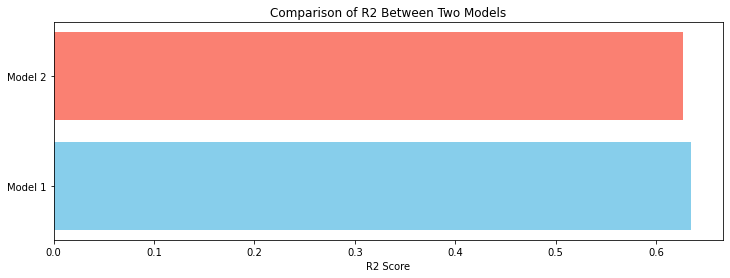

In [25]:
compare_metrics(model_1,model_2)

<font color='blue'><b>Комментарий ревьюера :</b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

Проанализируем результаты тренировочных моделей:

Модель 1:
- RMSE (корень из среднеквадратичной ошибки): 69610.584031
- MAE (средняя абсолютная ошибка): 50390.495256
- R2 (коэффициент детерминации): 0.635225

Модель 2:
- RMSE: 70447.955404
- MAE: 51388.608285
- R2: 0.626396

Обе модели показывают схожие результаты, однако модель 1 имеет немного более низкий показатель RMSE и более высокий R2, что говорит о лучшей предсказательной силе этой модели по сравнению с моделью 2. С другой стороны, модель 2 имеет немного более низкую среднюю абсолютную ошибку (MAE). В целом, обе модели представляют определенный уровень точности, но модель 1, вероятно, более предпочтительна из-за более низкой среднеквадратичной ошибки и более высокого коэффициента детерминации.

Проверим модели на тестовых данных.

In [26]:
#функция выводит графики сравнения моделей для каждой метрики в отдельном окне
def compare_metrics_test(model1, model2):
    summary1 = model1.evaluate(test)
    summary2 = model2.evaluate(test)
    
    print("Model 1 Metrics:")
    print('RMSE: %f' % summary1.rootMeanSquaredError)
    print('MAE: %f' % summary1.meanAbsoluteError)
    print('R2: %f' % summary1.r2)

    print("\nModel 2 Metrics:")
    print('RMSE: %f' % summary2.rootMeanSquaredError)
    print('MAE: %f' % summary2.meanAbsoluteError)
    print('R2: %f' % summary2.r2)

    # Построение графиков для каждой метрики
    plt.figure(figsize=(12, 4))
    plt.barh('Model 1', summary1.rootMeanSquaredError, color='skyblue')
    plt.barh('Model 2', summary2.rootMeanSquaredError, color='salmon')
    plt.xlabel('RMSE Score')
    plt.title('Comparison of RMSE Between Two Models')
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.barh('Model 1', summary1.meanAbsoluteError, color='skyblue')
    plt.barh('Model 2', summary2.meanAbsoluteError, color='salmon')
    plt.xlabel('MAE Score')
    plt.title('Comparison of MAE Between Two Models')
    plt.show()
  
    plt.figure(figsize=(12, 4))
    plt.barh('Model 1', summary1.r2, color='skyblue')
    plt.barh('Model 2', summary2.r2, color='salmon')
    plt.xlabel('R2 Score')
    plt.title('Comparison of R2 Between Two Models')
    plt.show()

Model 1 Metrics:
RMSE: 68194.455749
MAE: 49403.546441
R2: 0.653943

Model 2 Metrics:
RMSE: 69080.174907
MAE: 50391.638593
R2: 0.644896


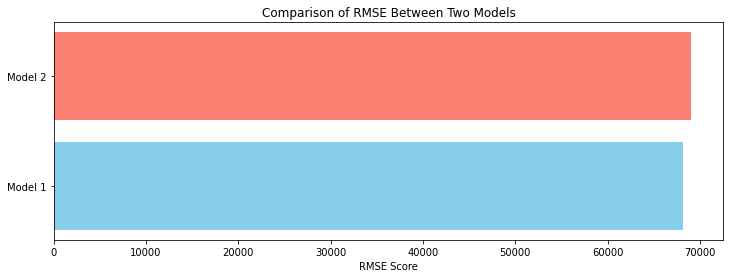

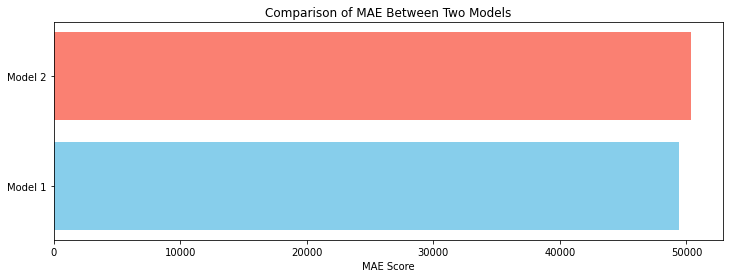

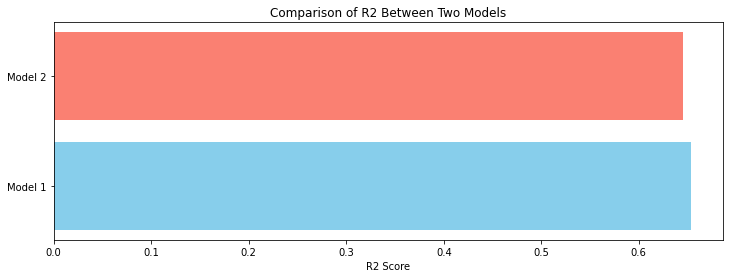

In [27]:
compare_metrics_test(model_1,model_2)

Проанализируем результаты работы моделей на тестовых данных:

Модель 1:
- RMSE (корень из среднеквадратичной ошибки): 68194.455749
- MAE (средняя абсолютная ошибка): 49403.546441
- R2 (коэффициент детерминации): 0.653943

Модель 2:
- RMSE: 69080.174907
- MAE: 50391.638593
- R2: 0.644896

Анализ показывает, что модель 1 продемонстрировала немного лучшие результаты на тестовых данных по сравнению с моделью 2. Модель 1 имеет немного более низкую среднеквадратичную ошибку и более высокий коэффициент детерминации, указывающий на лучшую предсказательную способность этой модели для новых данных. Однако обе модели показали сопоставимые результаты, что говорит о их относительно хорошем качестве и эффективности.

### Общий вывод

В данном проекте мы обучили модель линейной регрессии на данных о жилье в Калифорнии в 1990 году с использованием библиотеки MLlib (DataFrame-based) в Spark.

Мы инициализировали Spark сессии, загрузили данные, обработали их с помощью DataFrame API и обучили модели линейной регрессии на количественных и категориальных признаках.

Анализ результатов показал, что обе модели демонстрируют приемлемое качество предсказаний. Однако на тестовом наборе данных лучший результат показала модель, обученная как на количественных, так и на категориальных признаках. Обе модели продемонстрировали сопоставимые результаты, что указывает на их стабильность и хорошее качество. В целом, результаты показали, что модели не переобучились.

 
|Тренировочные модели:|Тестовые модели:|
|:---------------------:|:----------------:|
|  - Model 1 Metrics:|  - Model 1 Metrics:|
|  - RMSE: 69610.584031|  - RMSE: 68194.455749|
|  - MAE: 50390.495256|  - MAE: 49403.546441|
|  - R2: 0.635225|  - R2: 0.653943|
|||
|  - Model 2 Metrics:|  - Model 2 Metrics:|
|  - RMSE: 70447.955404|  - RMSE: 69080.174907|
|  - MAE: 51388.608285|  - MAE: 50391.638593|
|  - R2: 0.626396|  - R2: 0.644896|

Эти метрики свидетельствуют о том, что модель 1 имеет небольшое преимущество перед моделью 2, особенно в контексте коэффициента детерминации (R2).

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

In [28]:
#завершение сессии Spark 
spark.stop()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что не забываешь останавливать сессию!</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Виталий, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Поправь работу с данными (toPandas только для агрегированных данных).</font></ul>
<ul><font color='red'>Стандартизация и Кодировка для train и test по отдельности обработчиком обученным на train.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>